In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [11]:
def load_data(image_dir, mask_dir):
    images = []
    masks = []
    
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name.replace('.jpg', '.jpg'))  

        if os.path.isfile(img_path) and os.path.isfile(mask_path):
            image = cv2.imread(img_path)
            image = cv2.resize(image, (128, 128)) 
            image = image / 255.0 

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, (128, 128))
            mask = mask / 255.0  

            images.append(image)
            masks.append(mask)
            print(f"Loaded: {img_name} and {os.path.basename(mask_path)}")  
        else:
            print(f"File tidak ditemukan: {img_path} atau {mask_path}")

    if not images:
        print("Tidak ada gambar yang dimuat.")
    if not masks:
        print("Tidak ada mask yang dimuat.")
    
    return np.array(images), np.array(masks)

In [ ]:
def build_model():
    inputs = layers.Input(shape=(128, 128, 3))
    
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2_1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2_1)

    up1 = layers.UpSampling2D((2, 2))(pool2)
    concat1 = layers.concatenate([up1, conv2])
    conv3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(concat1)
    
    conv3_1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

    up2 = layers.UpSampling2D((2, 2))(conv3_1)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(up2)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

image_dir = 'images'  
mask_dir = 'masks'    

images, masks = load_data(image_dir, mask_dir)
print(f"Jumlah gambar: {len(images)}, Jumlah mask: {len(masks)}")

if len(images) == 0 or len(masks) == 0:
    raise ValueError("Dataset tidak terisi dengan benar.")

X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

model = build_model()
model.summary()

Loaded: CFD_001.jpg and CFD_001.jpg
Loaded: CFD_002.jpg and CFD_002.jpg
Loaded: CFD_003.jpg and CFD_003.jpg
Loaded: CFD_004.jpg and CFD_004.jpg
Loaded: CFD_005.jpg and CFD_005.jpg
Loaded: CFD_006.jpg and CFD_006.jpg
Loaded: CFD_007.jpg and CFD_007.jpg
Loaded: CFD_008.jpg and CFD_008.jpg
Loaded: CFD_009.jpg and CFD_009.jpg
Loaded: CFD_010.jpg and CFD_010.jpg
Loaded: CFD_011.jpg and CFD_011.jpg
Loaded: CFD_012.jpg and CFD_012.jpg
Loaded: CFD_013.jpg and CFD_013.jpg
Loaded: CFD_014.jpg and CFD_014.jpg
Loaded: CFD_015.jpg and CFD_015.jpg
Loaded: CFD_016.jpg and CFD_016.jpg
Loaded: CFD_017.jpg and CFD_017.jpg
Loaded: CFD_018.jpg and CFD_018.jpg
Loaded: CFD_019.jpg and CFD_019.jpg
Loaded: CFD_020.jpg and CFD_020.jpg
Loaded: CFD_021.jpg and CFD_021.jpg
Loaded: CFD_022.jpg and CFD_022.jpg
Loaded: CFD_023.jpg and CFD_023.jpg
Loaded: CFD_024.jpg and CFD_024.jpg
Loaded: CFD_025.jpg and CFD_025.jpg
Loaded: CFD_026.jpg and CFD_026.jpg
Loaded: CFD_027.jpg and CFD_027.jpg
Loaded: CFD_028.jpg and CFD_

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 64, 64,    │     36,928 │ conv2d_46[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_47[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_9     │ (None, 64, 64,    │          0 │ max_pooling2d_10… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 64, 64,    │          0 │ up_sampling2d_9[… │
│ (Concatenate)       │ 128)              │            │ conv2d_46[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 64, 64,    │     36,896 │ concatenate_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 64, 64,    │      9,248 │ conv2d_48[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_10    │ (None, 128, 128,  │          0 │ conv2d_49[0][0]   │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 128, 128,  │         33 │ up_sampling2d_10… │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,497 (400.38 KB)

 Trainable params: 102,497 (400.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 137s 471ms/step - accuracy: 0.9506 - loss: 0.1718 - val_accuracy: 0.9519 - val_loss: 0.1171
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 130s 460ms/step - accuracy: 0.9540 - loss: 0.1042 - val_accuracy: 0.9545 - val_loss: 0.0958
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.9543 - loss: 0.0980 - val_accuracy: 0.9551 - val_loss: 0.0917
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 133s 471ms/step - accuracy: 0.9553 - loss: 0.0927 - val_accuracy: 0.9554 - val_loss: 0.0923
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 133s 471ms/step - accuracy: 0.9550 - loss: 0.0922 - val_accuracy: 0.9552 - val_loss: 0.0929
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.9559 - loss: 0.0872 - val_accuracy: 0.9569 - val_loss: 0.0828
Epoch 7/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 134s 473ms/step - accuracy: 0.9567 - loss: 0.0842 - val_accuracy: 0.9570 - val_loss: 0.0838
Epoch 8/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.9568 -

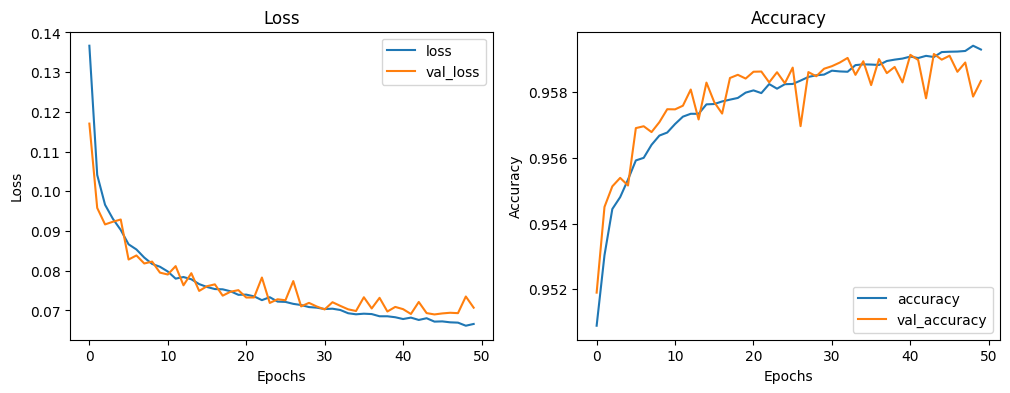

In [16]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

def plot_results(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_results(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


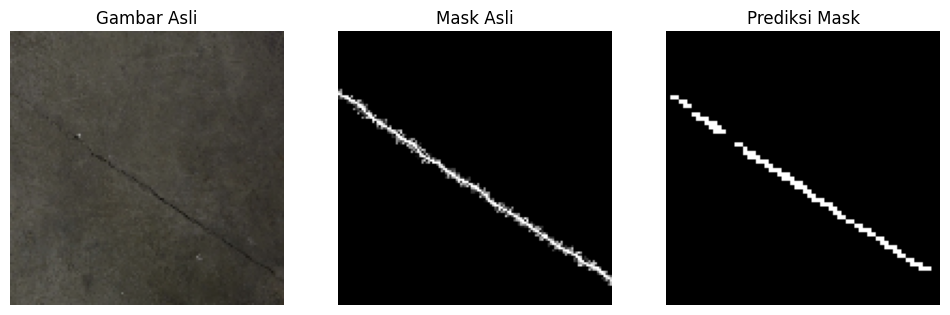

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


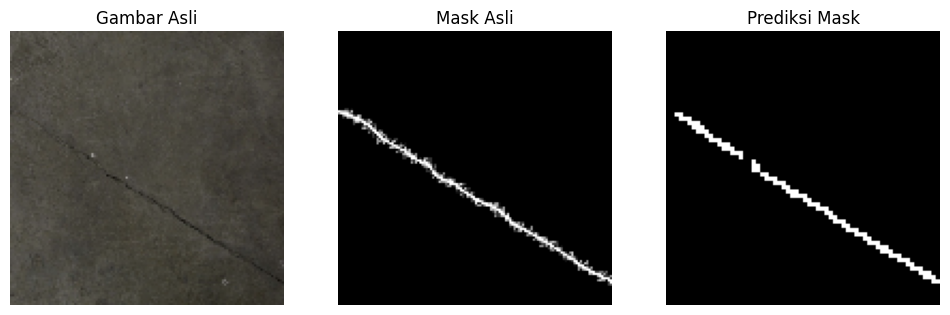

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


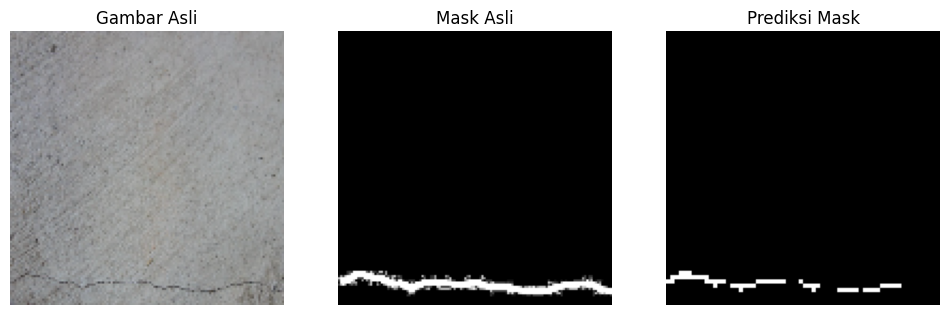

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


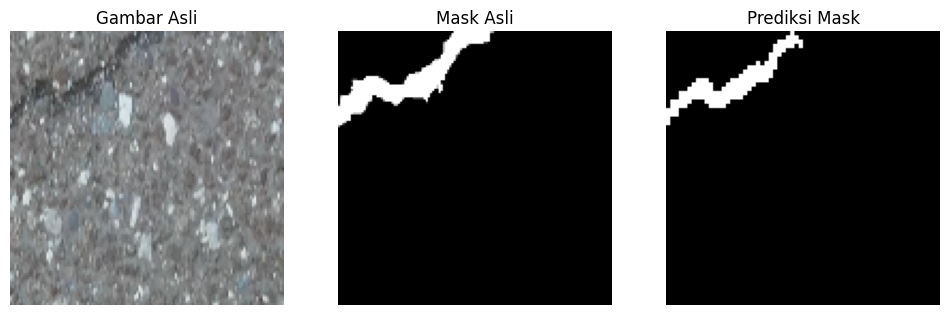

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


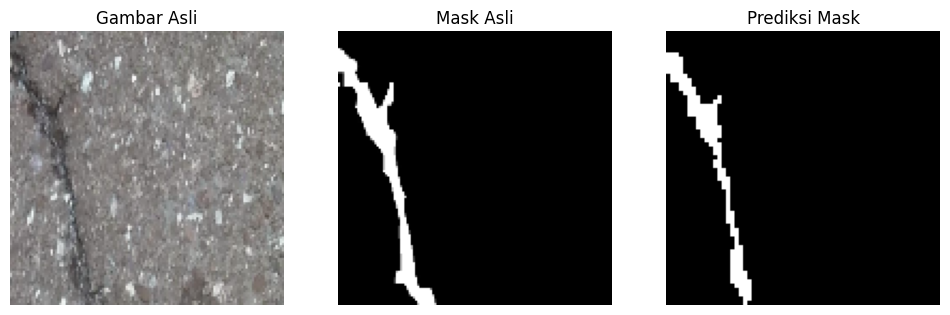

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


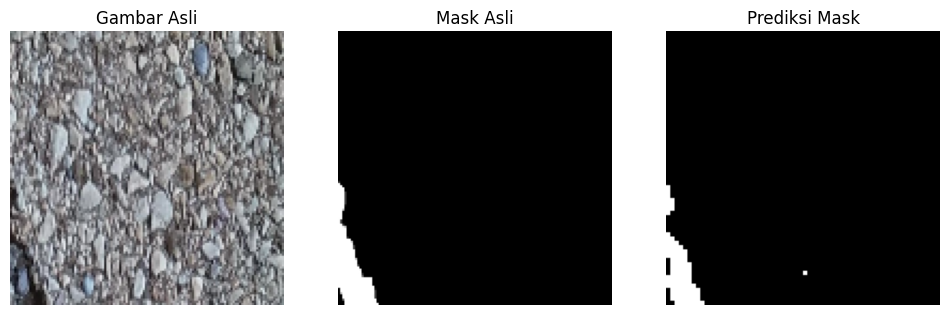

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


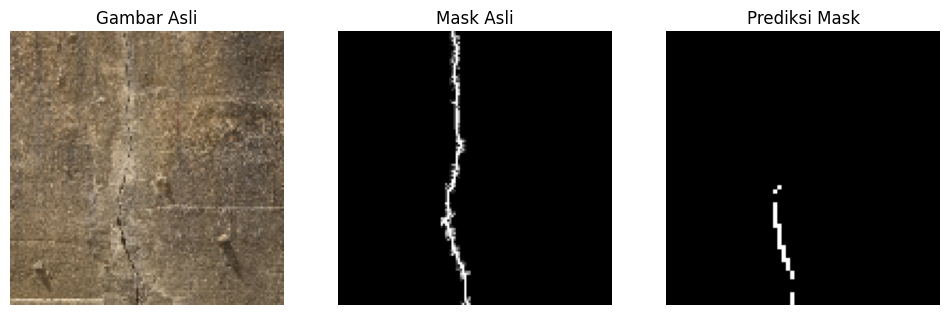

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


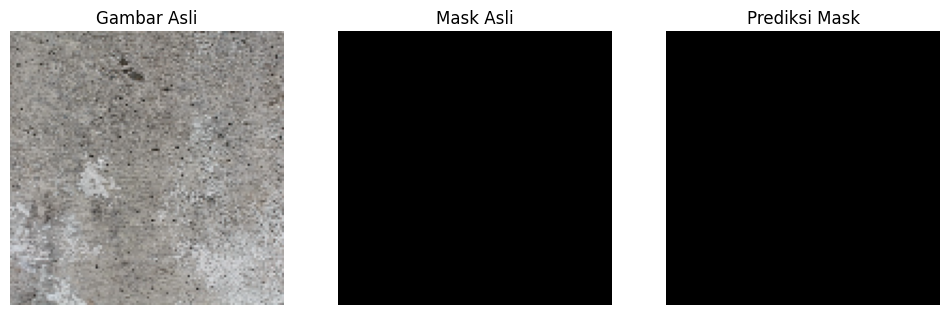

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


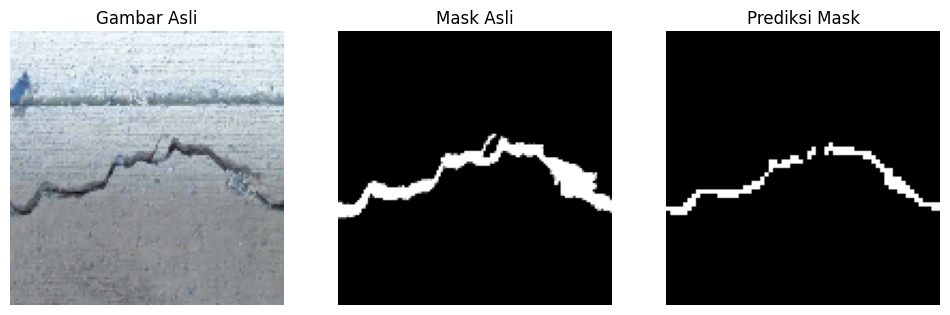

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


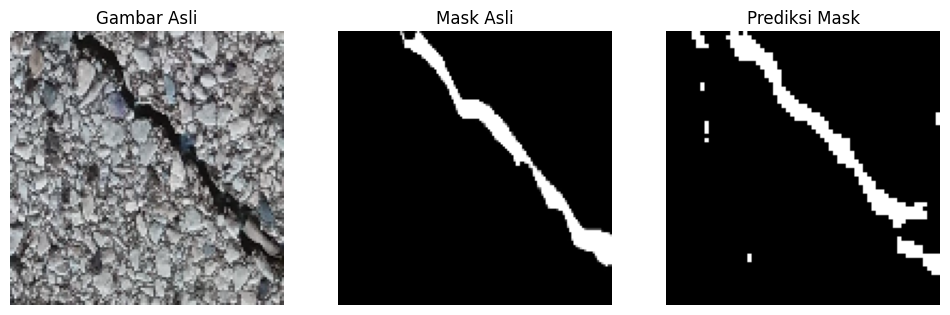

In [17]:
for i in range(10):
    pred_mask = model.predict(np.expand_dims(X_val[i], axis=0))
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Thresholding

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Gambar Asli')
    plt.imshow(X_val[i])
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask Asli')
    plt.imshow(y_val[i], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Prediksi Mask')
    plt.imshow(pred_mask[0].squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()